In [21]:
import os
import pandas as pd
import numpy as np

# Define the root directory for data
root_dir = r'D:\Experiment Data\Thesis Analysis'

# Initialize a data structure to store all loaded data
data_storage = {
    'Long Route': {
        'Normal Bike': {
            'No Load': {'High Speed': {'GSR': None, 'Eye': None},
                        'Low Speed': {'GSR': None, 'Eye': None}},
        },
        'Cargo Bike': {
            'With Load': {'High Speed': {'GSR': None, 'Eye': None},
                          'Low Speed': {'GSR': None, 'Eye': None}},
            'No Load': {'High Speed': {'GSR': None, 'Eye': None},
                        'Low Speed': {'GSR': None, 'Eye': None}},
        }
    },
    'Short Route': {
        'Normal Bike': {
            'No Load': {'High Speed': {'GSR': None, 'Eye': None},
                        'Low Speed': {'GSR': None, 'Eye': None}},
        },
        'Cargo Bike': {
            'With Load': {'High Speed': {'GSR': None, 'Eye': None},
                          'Low Speed': {'GSR': None, 'Eye': None}},
            'No Load': {'High Speed': {'GSR': None, 'Eye': None},
                        'Low Speed': {'GSR': None, 'Eye': None}},
        }
    }
}

# Function to load a CSV into a DataFrame
def load_csv_to_df(file_path):
    try:
        df = pd.read_csv(file_path)
        if not df.empty:
            return df
        else:
            print(f"Empty file: {file_path}")
            return pd.DataFrame()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return pd.DataFrame()

# Function to clean Eye data
def clean_eye_data(data):
    relevant_columns = ['gaze_timestamp', 'world_index', 'confidence', 'norm_pos_x', 'norm_pos_y']
    available_columns = [col for col in relevant_columns if col in data.columns]
    data = data[available_columns]
    if 'confidence' in data.columns:
        data = data[data['confidence'] > 0.6]  # Filter by confidence if column exists
    if 'norm_pos_x' in data.columns and 'norm_pos_y' in data.columns:
        data = data.dropna(subset=['norm_pos_x', 'norm_pos_y'])  # Drop rows where gaze positions are NaN
    return data

# Function to clean GSR data
def clean_gsr_data(data):
    relevant_columns = ['ms', 'no_units', 'uS', 'kOhms', 'mV', 'ms.1', 'BPM', 'relative_ms']
    available_columns = [col for col in relevant_columns if col in data.columns]
    data = data[available_columns]
    if 'uS' in data.columns:
        data = data.dropna(subset=['uS'])  # Ensure 'uS' has valid data
    return data

# Load Participant 2's GSR data 
participant_2_dir = os.path.join(root_dir, 'Long Route', 'Segmented_GSR_Data', 'Participant 2')

# Load the GSR files from Participant 2 to use as templates
for file_name in os.listdir(participant_2_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(participant_2_dir, file_name)
        gsr_df = pd.read_csv(file_path)
        if not gsr_df.empty:
            gsr_df = clean_gsr_data(gsr_df)  # Clean GSR data

# Traverse the folders to load the Eye and GSR data into data_storage
for root, dirs, files in os.walk(root_dir):
    for file in files:
        # Eye data loading
        if file.endswith('gaze_positions.csv'):
            route = 'Long Route' if 'Long Route' in root else 'Short Route'

            # Handle Normal Bike, which has no load condition
            if 'Normal Bike' in root:
                bike_type = 'Normal Bike'
                load_type = 'No Load'

                if 'High Speed' in root:
                    speed_type = 'High Speed'
                elif 'Low Speed' in root:
                    speed_type = 'Low Speed'
                else:
                    continue  # Skip if it's not in a speed folder

                file_path = os.path.join(root, file)
                df_eye = load_csv_to_df(file_path)
                df_eye = clean_eye_data(df_eye)  # Clean the eye data
                data_storage[route][bike_type][load_type][speed_type]['Eye'] = df_eye

            # Handle Cargo Bike, which has both load conditions and speed folders
            elif 'Cargo Bike' in root:
                bike_type = 'Cargo Bike'
                load_type = 'With Load' if 'With_Load' in root else 'No Load'

                if 'High Speed' in root:
                    speed_type = 'High Speed'
                elif 'Low Speed' in root:
                    speed_type = 'Low Speed'
                else:
                    continue  # Skip if it's not in a speed folder

                file_path = os.path.join(root, file)
                df_eye = load_csv_to_df(file_path)
                df_eye = clean_eye_data(df_eye)  # Clean the eye data
                data_storage[route][bike_type][load_type][speed_type]['Eye'] = df_eye

        # GSR data loading, cleaning
        if file.endswith('.csv') and '_GSR' in file:
            # Example filename: Cargo_Bike_High_Speed_No_Load_GSR.csv
            file_parts = file.split('_')

            if len(file_parts) < 6:  # Ensure filename structure is as expected
                print(f"Skipping file with unexpected format: {file}")
                continue

            bike_type = 'Cargo Bike' if 'Cargo' in file_parts[0] else 'Normal Bike'
            speed_type = 'High Speed' if 'High' in file_parts[2] else 'Low Speed'
            load_type = 'With Load' if 'With' in file_parts[4] else 'No Load'
            route = 'Long Route' if 'Long' in root else 'Short Route'

            file_path = os.path.join(root, file)
            try:
                gsr_data = pd.read_csv(file_path)
            except:
                gsr_data = pd.DataFrame()
            # print(f"Loading GSR data for {bike_type} ({load_type}) {speed_type} in {route}")

            if gsr_data.empty:  # Handle empty GSR files
                print(f"Empty GSR file detected: {file_path}.")

            data_storage[route][bike_type][load_type][speed_type]['GSR'] = gsr_data

# After processing, data_storage contains all the loaded and cleaned data
print("Cleaning complete.")


Cleaning complete.


In [22]:
data_storage

{'Long Route': {'Normal Bike': {'No Load': {'High Speed': {'GSR':                  ms   m/(s^2)  m/(s^2).1  m/(s^2).2  no_units        uS  \
     0      1.713449e+12  4.543478   1.043478  10.586957       3.0  1.060051   
     1      1.713449e+12  4.521739   1.054348  10.586957       3.0  1.060051   
     2      1.713449e+12  4.532609   1.108696  10.619565       3.0  1.060495   
     3      1.713449e+12  4.500000   1.163043  10.684783       3.0  1.060495   
     4      1.713449e+12  4.445652   1.184783  10.717391       3.0  1.060495   
     ...             ...       ...        ...        ...       ...       ...   
     20102  1.713449e+12  2.663043   0.380435  11.521739       3.0  1.171051   
     20103  1.713449e+12  2.826087   0.065217  11.282609       3.0  1.171051   
     20104  1.713449e+12  2.663043  -0.250000  11.010870       3.0  1.171051   
     20105  1.713449e+12  2.478261  -0.402174  10.260870       3.0  1.170607   
     20106  1.713449e+12  2.413043  -0.684783  10.597826   

In [23]:
import pandas as pd
import numpy as np

# Function to check for duplicates between High Speed and Low Speed
def check_duplicates(data_storage):
    duplicates = {}
    for route in data_storage:
        for bike_type in data_storage[route]:
            for load_type in data_storage[route][bike_type]:
                high_speed_eye = data_storage[route][bike_type][load_type]['High Speed']['Eye']
                low_speed_eye = data_storage[route][bike_type][load_type]['Low Speed']['Eye']

                if not high_speed_eye.empty and not low_speed_eye.empty:
                    # Check if the two dataframes are identical
                    are_identical = high_speed_eye.equals(low_speed_eye)
                    duplicates[(route, bike_type, load_type)] = are_identical
    return duplicates

# Run the function to check for duplicates
duplicates = check_duplicates(data_storage)

# Display the results
for condition, is_duplicate in duplicates.items():
    print(f"Condition: {condition} - Duplicates Found: {is_duplicate}")


Condition: ('Long Route', 'Normal Bike', 'No Load') - Duplicates Found: False
Condition: ('Long Route', 'Cargo Bike', 'With Load') - Duplicates Found: False
Condition: ('Long Route', 'Cargo Bike', 'No Load') - Duplicates Found: False
Condition: ('Short Route', 'Normal Bike', 'No Load') - Duplicates Found: False
Condition: ('Short Route', 'Cargo Bike', 'With Load') - Duplicates Found: False
Condition: ('Short Route', 'Cargo Bike', 'No Load') - Duplicates Found: False


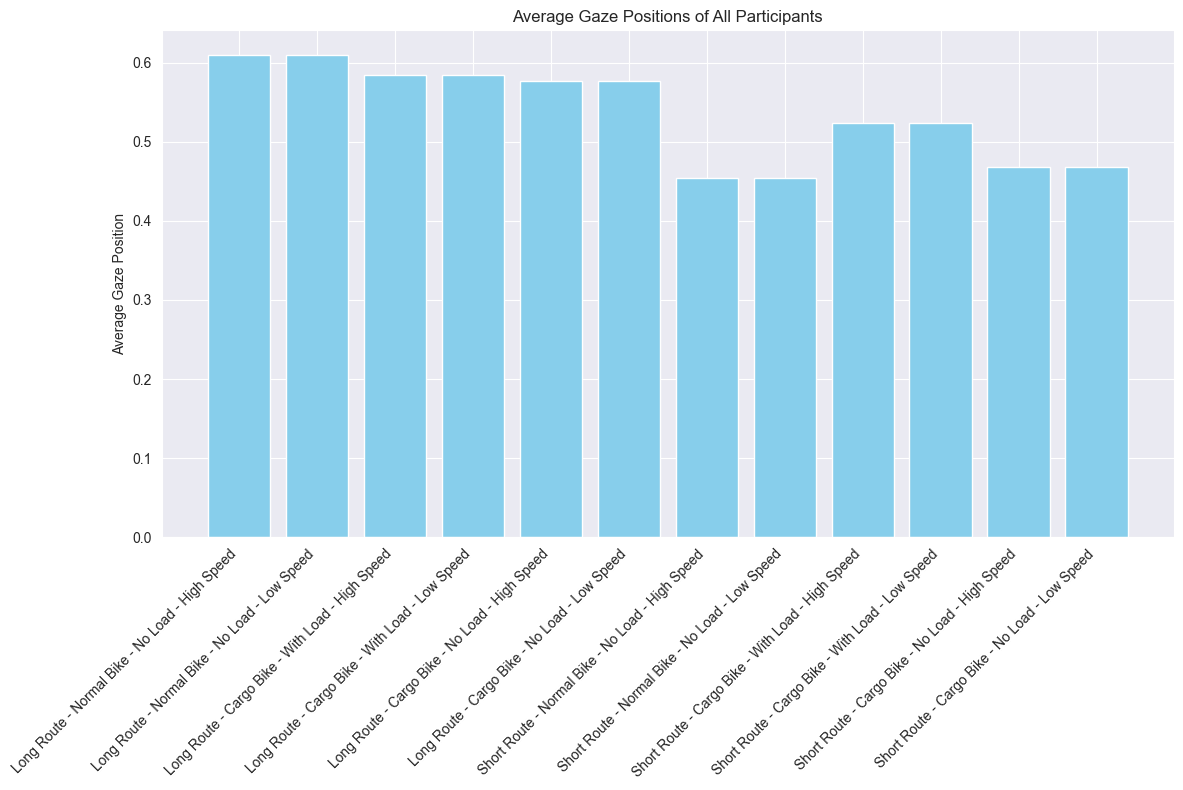

'output_csv_files/average_gaze_positions.csv'

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate the average gaze position
def calculate_average_gaze(data_storage):
    average_gaze_positions = []
    conditions = []

    for route in data_storage:
        for bike_type in data_storage[route]:
            for load_type in data_storage[route][bike_type]:
                for speed_type in data_storage[route][bike_type][load_type]:
                    eye_data = data_storage[route][bike_type][load_type][speed_type]['Eye']
                    if not eye_data.empty:
                        avg_norm_pos_x = eye_data['norm_pos_x'].mean()
                        avg_norm_pos_y = eye_data['norm_pos_y'].mean()
                        average_gaze_positions.append((avg_norm_pos_x + avg_norm_pos_y) / 2)
                        conditions.append(f"{route} - {bike_type} - {load_type} - {speed_type}")

    return conditions, average_gaze_positions

# Assuming data_storage is the variable containing the data
conditions, average_gaze_positions = calculate_average_gaze(data_storage)

# Plotting the vertical bar graph
plt.figure(figsize=(12, 8))
plt.bar(conditions, average_gaze_positions, color='skyblue')
plt.ylabel('Average Gaze Position')
plt.title('Average Gaze Positions of All Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data = pd.DataFrame({
    'Condition': conditions,
    'Average Gaze Position': average_gaze_positions
})

# Save to a CSV file
output_file_path = 'output_csv_files/average_gaze_positions.csv'
output_data.to_csv(output_file_path, index=False)

output_file_path


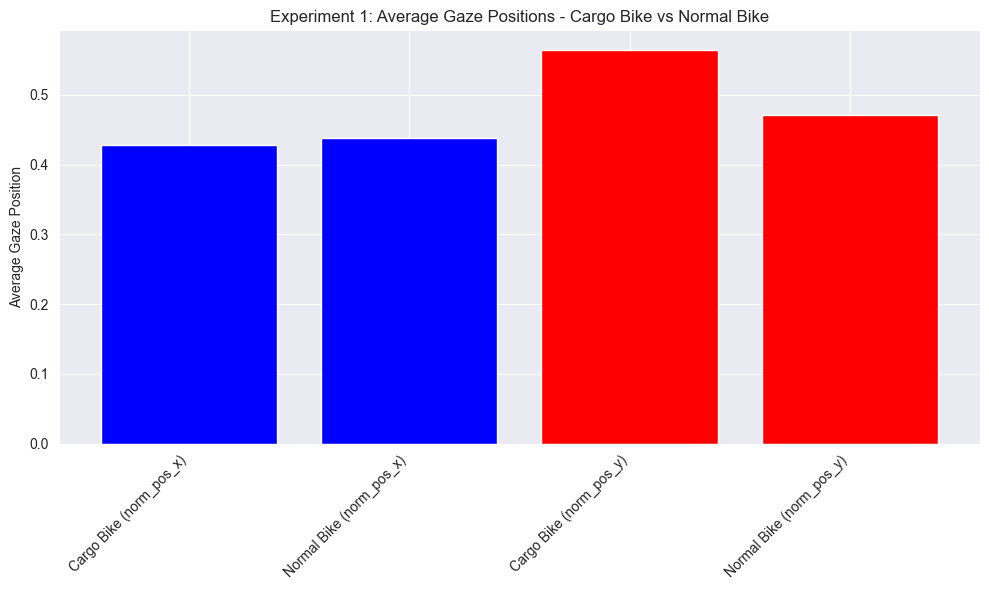

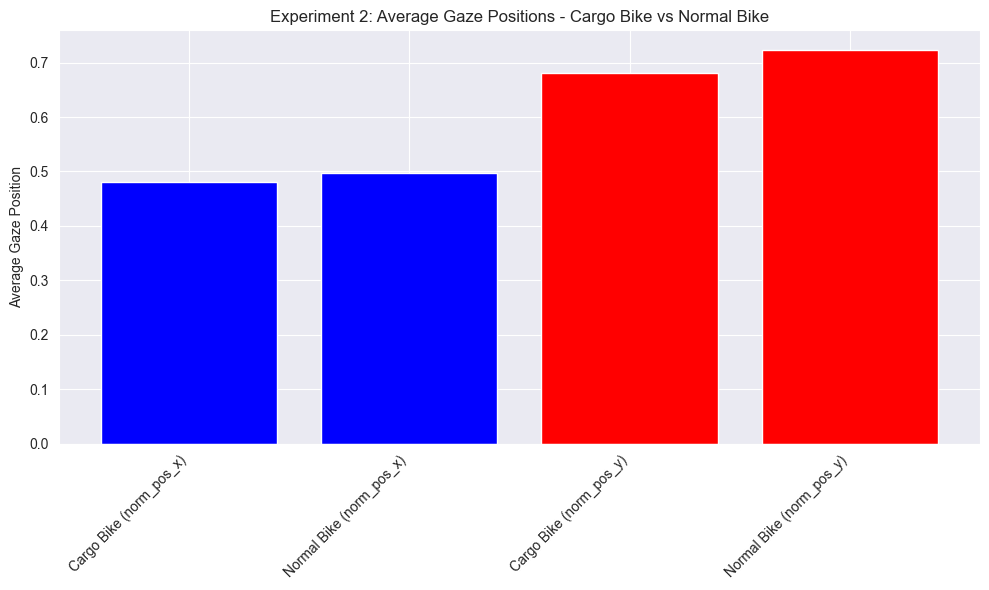

('output_csv_files\\experiment_1_short_route_gaze_positions.csv',
 'output_csv_files\\experiment_2_long_route_gaze_positions.csv')

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate average gaze positions for Cargo Bike vs Normal Bike
def calculate_gaze_positions_bike_comparison(data_storage, route_name):
    gaze_positions = {
        'Cargo Bike (norm_pos_x)': [],
        'Normal Bike (norm_pos_x)': [],
        'Cargo Bike (norm_pos_y)': [],
        'Normal Bike (norm_pos_y)': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    avg_norm_pos_x = eye_data['norm_pos_x'].mean()
                    avg_norm_pos_y = eye_data['norm_pos_y'].mean()

                    if bike_type == 'Cargo Bike':
                        gaze_positions['Cargo Bike (norm_pos_x)'].append(avg_norm_pos_x)
                        gaze_positions['Cargo Bike (norm_pos_y)'].append(avg_norm_pos_y)
                    elif bike_type == 'Normal Bike':
                        gaze_positions['Normal Bike (norm_pos_x)'].append(avg_norm_pos_x)
                        gaze_positions['Normal Bike (norm_pos_y)'].append(avg_norm_pos_y)

    # Calculate the mean of the positions
    for key in gaze_positions:
        gaze_positions[key] = sum(gaze_positions[key]) / len(gaze_positions[key]) if gaze_positions[key] else 0

    return gaze_positions

# Calculate the gaze positions for Short Route (Experiment 1)
gaze_positions_short = calculate_gaze_positions_bike_comparison(data_storage, 'Short Route')

# Calculate the gaze positions for Long Route (Experiment 2)
gaze_positions_long = calculate_gaze_positions_bike_comparison(data_storage, 'Long Route')

# Plotting the Short Route (Experiment 1) graph
plt.figure(figsize=(10, 6))
conditions_short = list(gaze_positions_short.keys())
average_positions_short = list(gaze_positions_short.values())
colors = ['blue', 'blue', 'red', 'red']
plt.bar(conditions_short, average_positions_short, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 1: Average Gaze Positions - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data = pd.DataFrame({
    'Condition': conditions_short,
    'Average Gaze Position': average_positions_short
})

# Plotting the Long Route (Experiment 2) graph
plt.figure(figsize=(10, 6))
conditions_long = list(gaze_positions_long.keys())
average_positions_long = list(gaze_positions_long.values())
plt.bar(conditions_long, average_positions_long, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 2: Average Gaze Positions - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import os

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions_short,
    'Average Gaze Position': average_positions_short
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_gaze_positions.csv')
output_data_short.to_csv(output_file_short, index=False)

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions_long,
    'Average Gaze Position': average_positions_long
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_gaze_positions.csv')
output_data_long.to_csv(output_file_long, index=False)

output_file_short, output_file_long



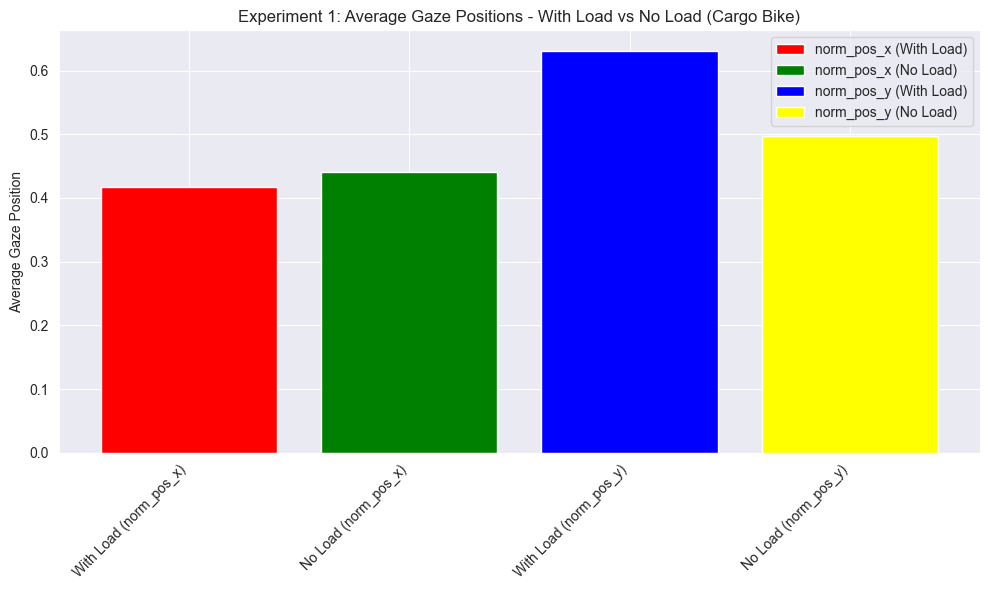

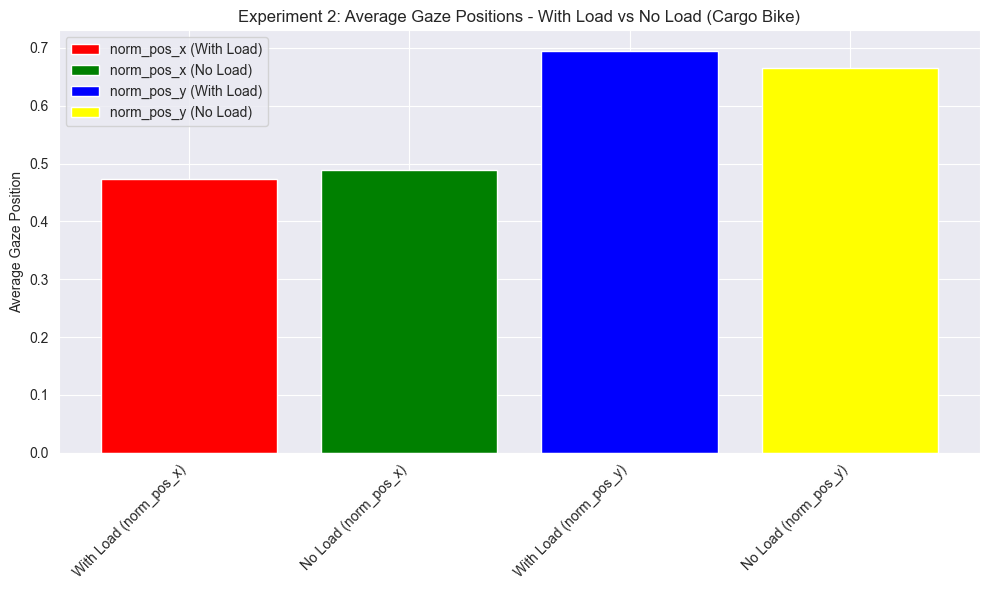

Short route data saved to output_csv_files\experiment_1_short_route_gaze_positions_load_comparison.csv
Long route data saved to output_csv_files\experiment_2_long_route_gaze_positions_load_comparison.csv


(                Condition  Average Gaze Position
 0  With Load (norm_pos_x)               0.416567
 1    No Load (norm_pos_x)               0.440212
 2  With Load (norm_pos_y)               0.631588
 3    No Load (norm_pos_y)               0.496811,
                 Condition  Average Gaze Position
 0  With Load (norm_pos_x)               0.473432
 1    No Load (norm_pos_x)               0.489042
 2  With Load (norm_pos_y)               0.695635
 3    No Load (norm_pos_y)               0.665294)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to calculate average gaze positions for With Load vs No Load (Cargo Bike only)
def calculate_gaze_positions_load_comparison(data_storage, route_name):
    gaze_positions = {
        'With Load (norm_pos_x)': [],
        'No Load (norm_pos_x)': [],
        'With Load (norm_pos_y)': [],
        'No Load (norm_pos_y)': []
    }

    if 'Cargo Bike' in data_storage[route_name]:
        for load_type in data_storage[route_name]['Cargo Bike']:
            for speed_type in data_storage[route_name]['Cargo Bike'][load_type]:
                eye_data = data_storage[route_name]['Cargo Bike'][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    avg_norm_pos_x = eye_data['norm_pos_x'].mean()
                    avg_norm_pos_y = eye_data['norm_pos_y'].mean()

                    if load_type == 'With Load':
                        gaze_positions['With Load (norm_pos_x)'].append(avg_norm_pos_x)
                        gaze_positions['With Load (norm_pos_y)'].append(avg_norm_pos_y)
                    elif load_type == 'No Load':
                        gaze_positions['No Load (norm_pos_x)'].append(avg_norm_pos_x)
                        gaze_positions['No Load (norm_pos_y)'].append(avg_norm_pos_y)

    # Calculate the mean of the positions
    for key in gaze_positions:
        gaze_positions[key] = sum(gaze_positions[key]) / len(gaze_positions[key]) if gaze_positions[key] else 0

    return gaze_positions

# Calculate the gaze positions for Short Route (Experiment 1)
gaze_positions_short = calculate_gaze_positions_load_comparison(data_storage, 'Short Route')

# Calculate the gaze positions for Long Route (Experiment 2)
gaze_positions_long = calculate_gaze_positions_load_comparison(data_storage, 'Long Route')

# Plotting the Short Route (Experiment 1) graph
plt.figure(figsize=(10, 6))
conditions_short = list(gaze_positions_short.keys())
average_positions_short = list(gaze_positions_short.values())
colors = ['red', 'green', 'blue', 'yellow']
bars_short = plt.bar(conditions_short, average_positions_short, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 1: Average Gaze Positions - With Load vs No Load (Cargo Bike)')
plt.xticks(rotation=45, ha='right')

legend_labels_short = ['norm_pos_x (With Load)', 'norm_pos_x (No Load)', 'norm_pos_y (With Load)', 'norm_pos_y (No Load)']
plt.legend(bars_short, legend_labels_short)
plt.tight_layout()
plt.show()

# Plotting the Long Route (Experiment 2) graph
plt.figure(figsize=(10, 6))
conditions_long = list(gaze_positions_long.keys())
average_positions_long = list(gaze_positions_long.values())
bars_long = plt.bar(conditions_long, average_positions_long, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 2: Average Gaze Positions - With Load vs No Load (Cargo Bike)')
plt.xticks(rotation=45, ha='right')

# Adding legend
legend_labels_long = ['norm_pos_x (With Load)', 'norm_pos_x (No Load)', 'norm_pos_y (With Load)', 'norm_pos_y (No Load)']
plt.legend(bars_long, legend_labels_long)
plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions_short,
    'Average Gaze Position': average_positions_short
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_gaze_positions_load_comparison.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions_long,
    'Average Gaze Position': average_positions_long
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_gaze_positions_load_comparison.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


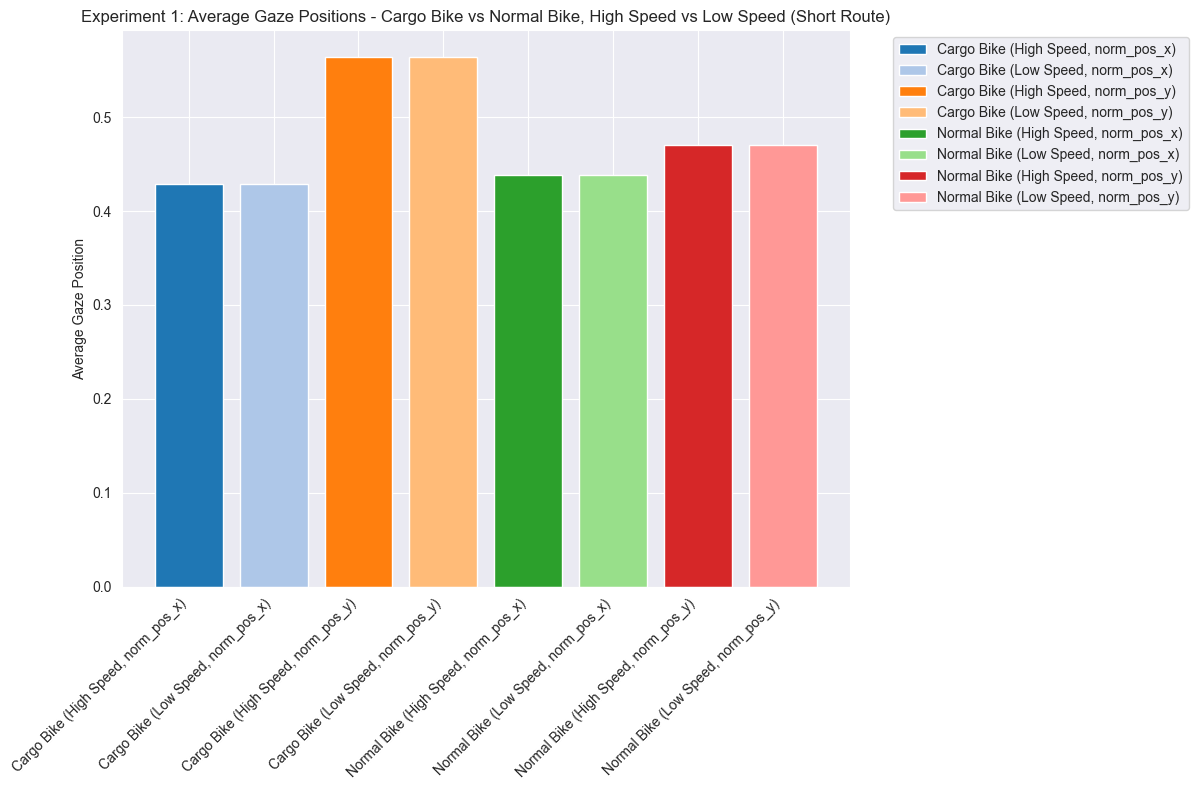

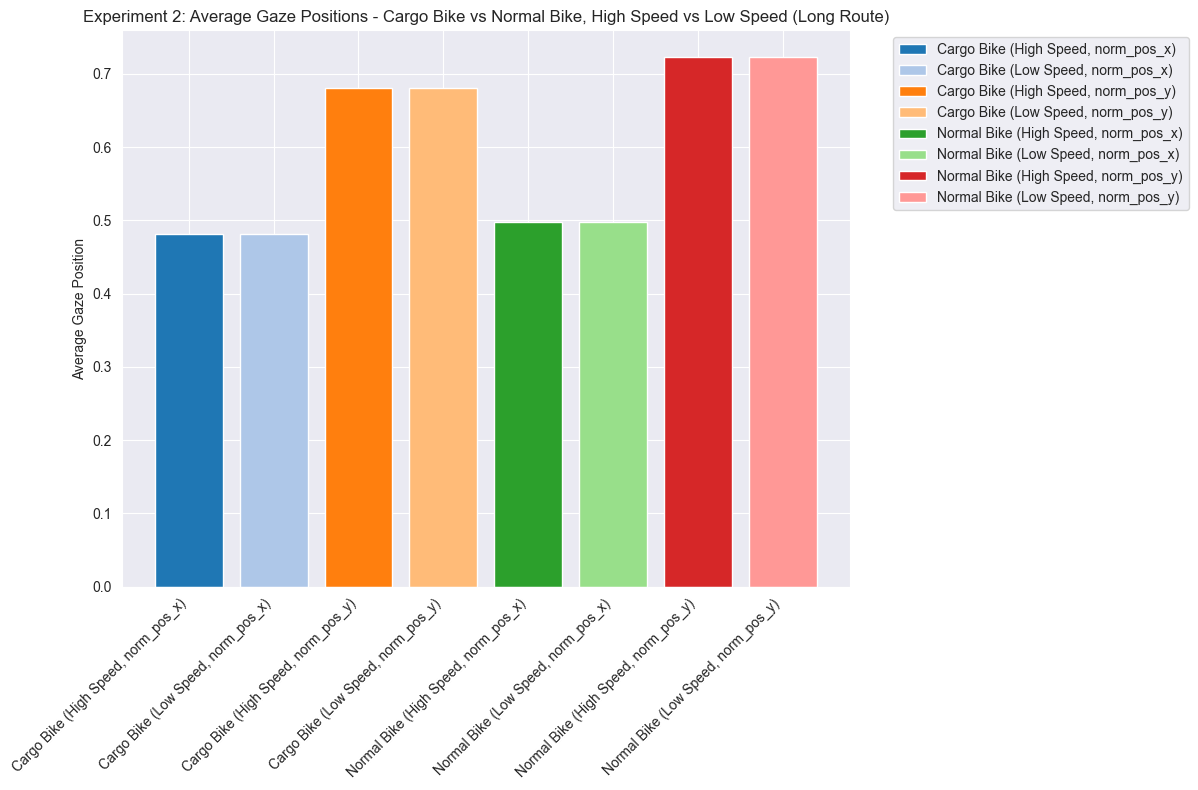

Short route data saved to output_csv_files\experiment_1_short_route_gaze_positions_bike_speed_comparison.csv
Long route data saved to output_csv_files\experiment_2_long_route_gaze_positions_bike_speed_comparison.csv


(                              Condition  Average Gaze Position
 0   Cargo Bike (High Speed, norm_pos_x)               0.428396
 1    Cargo Bike (Low Speed, norm_pos_x)               0.428383
 2   Cargo Bike (High Speed, norm_pos_y)               0.564176
 3    Cargo Bike (Low Speed, norm_pos_y)               0.564223
 4  Normal Bike (High Speed, norm_pos_x)               0.438499
 5   Normal Bike (Low Speed, norm_pos_x)               0.438414
 6  Normal Bike (High Speed, norm_pos_y)               0.470454
 7   Normal Bike (Low Speed, norm_pos_y)               0.470491,
                               Condition  Average Gaze Position
 0   Cargo Bike (High Speed, norm_pos_x)               0.481239
 1    Cargo Bike (Low Speed, norm_pos_x)               0.481234
 2   Cargo Bike (High Speed, norm_pos_y)               0.680470
 3    Cargo Bike (Low Speed, norm_pos_y)               0.680460
 4  Normal Bike (High Speed, norm_pos_x)               0.497491
 5   Normal Bike (Low Speed, norm_pos_x

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to calculate average gaze positions for Cargo Bike vs Normal Bike and High Speed vs Low Speed
def calculate_gaze_positions_bike_speed_comparison(data_storage, route_name):
    gaze_positions = {
        'Cargo Bike (High Speed, norm_pos_x)': [],
        'Cargo Bike (Low Speed, norm_pos_x)': [],
        'Cargo Bike (High Speed, norm_pos_y)': [],
        'Cargo Bike (Low Speed, norm_pos_y)': [],
        'Normal Bike (High Speed, norm_pos_x)': [],
        'Normal Bike (Low Speed, norm_pos_x)': [],
        'Normal Bike (High Speed, norm_pos_y)': [],
        'Normal Bike (Low Speed, norm_pos_y)': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    avg_norm_pos_x = eye_data['norm_pos_x'].mean()
                    avg_norm_pos_y = eye_data['norm_pos_y'].mean()

                    if bike_type == 'Cargo Bike':
                        if speed_type == 'High Speed':
                            gaze_positions['Cargo Bike (High Speed, norm_pos_x)'].append(avg_norm_pos_x)
                            gaze_positions['Cargo Bike (High Speed, norm_pos_y)'].append(avg_norm_pos_y)
                        elif speed_type == 'Low Speed':
                            gaze_positions['Cargo Bike (Low Speed, norm_pos_x)'].append(avg_norm_pos_x)
                            gaze_positions['Cargo Bike (Low Speed, norm_pos_y)'].append(avg_norm_pos_y)
                    elif bike_type == 'Normal Bike':
                        if speed_type == 'High Speed':
                            gaze_positions['Normal Bike (High Speed, norm_pos_x)'].append(avg_norm_pos_x)
                            gaze_positions['Normal Bike (High Speed, norm_pos_y)'].append(avg_norm_pos_y)
                        elif speed_type == 'Low Speed':
                            gaze_positions['Normal Bike (Low Speed, norm_pos_x)'].append(avg_norm_pos_x)
                            gaze_positions['Normal Bike (Low Speed, norm_pos_y)'].append(avg_norm_pos_y)

    # Calculate the mean of the positions
    for key in gaze_positions:
        gaze_positions[key] = sum(gaze_positions[key]) / len(gaze_positions[key]) if gaze_positions[key] else 0

    return gaze_positions

# Calculate the gaze positions for Short Route (Experiment 1)
gaze_positions_short = calculate_gaze_positions_bike_speed_comparison(data_storage, 'Short Route')

# Calculate the gaze positions for Long Route (Experiment 2)
gaze_positions_long = calculate_gaze_positions_bike_speed_comparison(data_storage, 'Long Route')

# Define the color palette
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896']

# Plotting the Short Route (Experiment 1) graph
plt.figure(figsize=(12, 8))
conditions_short = list(gaze_positions_short.keys())
average_positions_short = list(gaze_positions_short.values())
bars_short = plt.bar(conditions_short, average_positions_short, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 1: Average Gaze Positions - Cargo Bike vs Normal Bike, High Speed vs Low Speed (Short Route)')
plt.xticks(rotation=45, ha='right')

# Adding legend
legend_labels_short = [
    'Cargo Bike (High Speed, norm_pos_x)', 'Cargo Bike (Low Speed, norm_pos_x)',
    'Cargo Bike (High Speed, norm_pos_y)', 'Cargo Bike (Low Speed, norm_pos_y)',
    'Normal Bike (High Speed, norm_pos_x)', 'Normal Bike (Low Speed, norm_pos_x)',
    'Normal Bike (High Speed, norm_pos_y)', 'Normal Bike (Low Speed, norm_pos_y)'
]
plt.legend(bars_short, legend_labels_short, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plotting the Long Route (Experiment 2) graph
plt.figure(figsize=(12, 8))
conditions_long = list(gaze_positions_long.keys())
average_positions_long = list(gaze_positions_long.values())
bars_long = plt.bar(conditions_long, average_positions_long, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 2: Average Gaze Positions - Cargo Bike vs Normal Bike, High Speed vs Low Speed (Long Route)')
plt.xticks(rotation=45, ha='right')

# Adding legend
plt.legend(bars_long, legend_labels_short, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions_short,
    'Average Gaze Position': average_positions_short
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_gaze_positions_bike_speed_comparison.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions_long,
    'Average Gaze Position': average_positions_long
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_gaze_positions_bike_speed_comparison.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


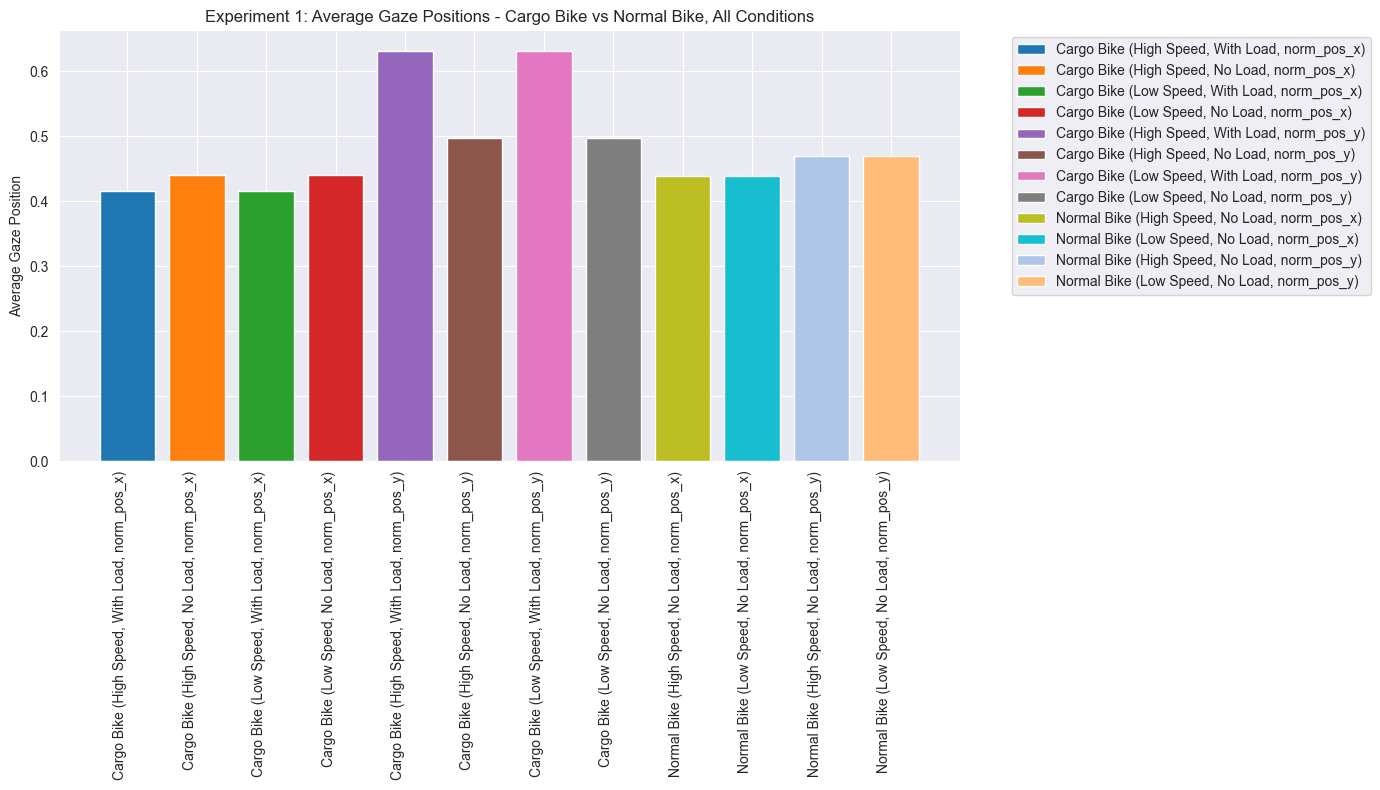

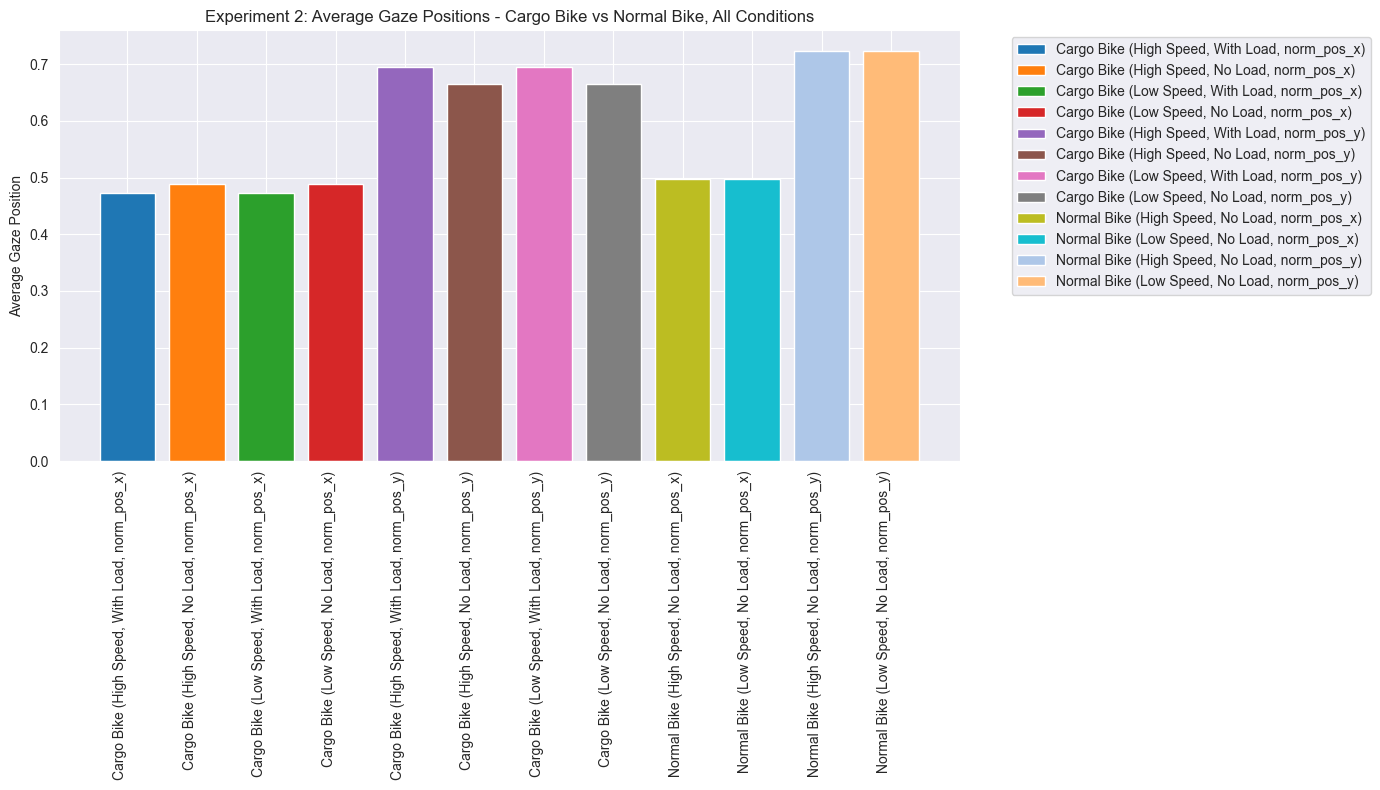

Short route data saved to output_csv_files\experiment_1_short_route_gaze_positions_all_conditions.csv
Long route data saved to output_csv_files\experiment_2_long_route_gaze_positions_all_conditions.csv


(                                         Condition  Average Gaze Position
 0   Cargo Bike (High Speed, With Load, norm_pos_x)               0.416570
 1     Cargo Bike (High Speed, No Load, norm_pos_x)               0.440223
 2    Cargo Bike (Low Speed, With Load, norm_pos_x)               0.416565
 3      Cargo Bike (Low Speed, No Load, norm_pos_x)               0.440202
 4   Cargo Bike (High Speed, With Load, norm_pos_y)               0.631590
 5     Cargo Bike (High Speed, No Load, norm_pos_y)               0.496762
 6    Cargo Bike (Low Speed, With Load, norm_pos_y)               0.631587
 7      Cargo Bike (Low Speed, No Load, norm_pos_y)               0.496860
 8    Normal Bike (High Speed, No Load, norm_pos_x)               0.438499
 9     Normal Bike (Low Speed, No Load, norm_pos_x)               0.438414
 10   Normal Bike (High Speed, No Load, norm_pos_y)               0.470454
 11    Normal Bike (Low Speed, No Load, norm_pos_y)               0.470491,
                        

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to calculate average gaze positions for all conditions excluding "Normal Bike With Load"
def calculate_gaze_positions_all_conditions(data_storage, route_name):
    gaze_positions = {
        'Cargo Bike (High Speed, With Load, norm_pos_x)': [],
        'Cargo Bike (High Speed, No Load, norm_pos_x)': [],
        'Cargo Bike (Low Speed, With Load, norm_pos_x)': [],
        'Cargo Bike (Low Speed, No Load, norm_pos_x)': [],
        'Cargo Bike (High Speed, With Load, norm_pos_y)': [],
        'Cargo Bike (High Speed, No Load, norm_pos_y)': [],
        'Cargo Bike (Low Speed, With Load, norm_pos_y)': [],
        'Cargo Bike (Low Speed, No Load, norm_pos_y)': [],
        'Normal Bike (High Speed, No Load, norm_pos_x)': [],
        'Normal Bike (Low Speed, No Load, norm_pos_x)': [],
        'Normal Bike (High Speed, No Load, norm_pos_y)': [],
        'Normal Bike (Low Speed, No Load, norm_pos_y)': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    avg_norm_pos_x = eye_data['norm_pos_x'].mean()
                    avg_norm_pos_y = eye_data['norm_pos_y'].mean()

                    condition_key_x = f"{bike_type} ({speed_type}, {load_type}, norm_pos_x)"
                    condition_key_y = f"{bike_type} ({speed_type}, {load_type}, norm_pos_y)"

                    if condition_key_x in gaze_positions:
                        gaze_positions[condition_key_x].append(avg_norm_pos_x)
                    if condition_key_y in gaze_positions:
                        gaze_positions[condition_key_y].append(avg_norm_pos_y)

    # Calculate the mean of the positions
    for key in gaze_positions:
        gaze_positions[key] = sum(gaze_positions[key]) / len(gaze_positions[key]) if gaze_positions[key] else 0

    return gaze_positions

# Calculate the gaze positions for Short Route (Experiment 1)
gaze_positions_short = calculate_gaze_positions_all_conditions(data_storage, 'Short Route')

# Calculate the gaze positions for Long Route (Experiment 2)
gaze_positions_long = calculate_gaze_positions_all_conditions(data_storage, 'Long Route')

# Define the color palette
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#aec7e8', '#ffbb78'
]

# Plotting the Short Route (Experiment 1) graph
plt.figure(figsize=(14, 8))
conditions_short = list(gaze_positions_short.keys())
average_positions_short = list(gaze_positions_short.values())
bars_short = plt.bar(conditions_short, average_positions_short, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 1: Average Gaze Positions - Cargo Bike vs Normal Bike, All Conditions')
plt.xticks(rotation=90, ha='right')

# Adding legend
legend_labels_short = conditions_short
plt.legend(bars_short, legend_labels_short, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plotting the Long Route (Experiment 2) graph
plt.figure(figsize=(14, 8))
conditions_long = list(gaze_positions_long.keys())
average_positions_long = list(gaze_positions_long.values())
bars_long = plt.bar(conditions_long, average_positions_long, color=colors)
plt.ylabel('Average Gaze Position')
plt.title('Experiment 2: Average Gaze Positions - Cargo Bike vs Normal Bike, All Conditions')
plt.xticks(rotation=90, ha='right')

# Adding legend
legend_labels_long = conditions_long
plt.legend(bars_long, legend_labels_long, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions_short,
    'Average Gaze Position': average_positions_short
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_gaze_positions_all_conditions.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions_long,
    'Average Gaze Position': average_positions_long
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_gaze_positions_all_conditions.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


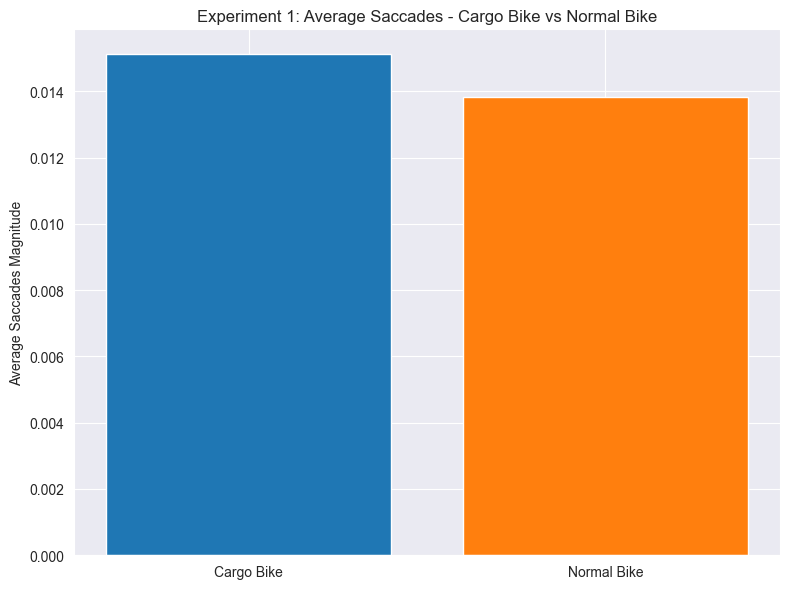

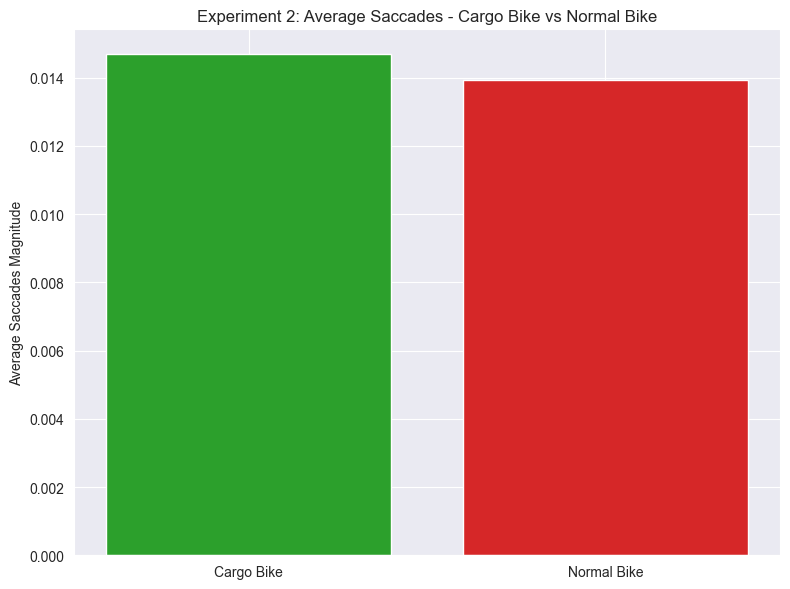

Short route data saved to output_csv_files\experiment_1_short_route_average_saccades.csv
Long route data saved to output_csv_files\experiment_2_long_route_average_saccades.csv


(     Condition  Average Saccades Magnitude
 0   Cargo Bike                    0.015109
 1  Normal Bike                    0.013829,
      Condition  Average Saccades Magnitude
 0   Cargo Bike                    0.014676
 1  Normal Bike                    0.013939)

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Function to calculate saccades based on changes in gaze positions
def calculate_saccades(eye_data):
    if len(eye_data) < 2:
        return []

    # Calculate the differences between consecutive gaze points
    dx = eye_data['norm_pos_x'].diff().dropna()
    dy = eye_data['norm_pos_y'].diff().dropna()

    # Calculate the Euclidean distance for each saccade
    saccades = np.sqrt(dx**2 + dy**2)
    return saccades

# Function to calculate average saccades for Cargo Bike and Normal Bike
def calculate_average_saccades(data_storage, route_name):
    saccades_data = {
        'Cargo Bike': [],
        'Normal Bike': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    saccades = calculate_saccades(eye_data)
                    if bike_type in saccades_data:
                        saccades_data[bike_type].extend(saccades)

    # Calculate the average saccades
    for key in saccades_data:
        saccades_data[key] = np.mean(saccades_data[key]) if saccades_data[key] else 0

    return saccades_data

# Calculate the average saccades for Short Route (Experiment 1)
average_saccades_short = calculate_average_saccades(data_storage, 'Short Route')

# Calculate the average saccades for Long Route (Experiment 2)
average_saccades_long = calculate_average_saccades(data_storage, 'Long Route')

# Define the data for plotting
labels = ['Cargo Bike', 'Normal Bike']
experiment_1_saccades = [average_saccades_short['Cargo Bike'], average_saccades_short['Normal Bike']]
experiment_2_saccades = [average_saccades_long['Cargo Bike'], average_saccades_long['Normal Bike']]

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(8, 6))
plt.bar(labels, experiment_1_saccades, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Average Saccades Magnitude')
plt.title('Experiment 1: Average Saccades - Cargo Bike vs Normal Bike')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(8, 6))
plt.bar(labels, experiment_2_saccades, color=['#2ca02c', '#d62728'])
plt.ylabel('Average Saccades Magnitude')
plt.title('Experiment 2: Average Saccades - Cargo Bike vs Normal Bike')
plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': labels,
    'Average Saccades Magnitude': experiment_1_saccades
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_average_saccades.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': labels,
    'Average Saccades Magnitude': experiment_2_saccades
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_average_saccades.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


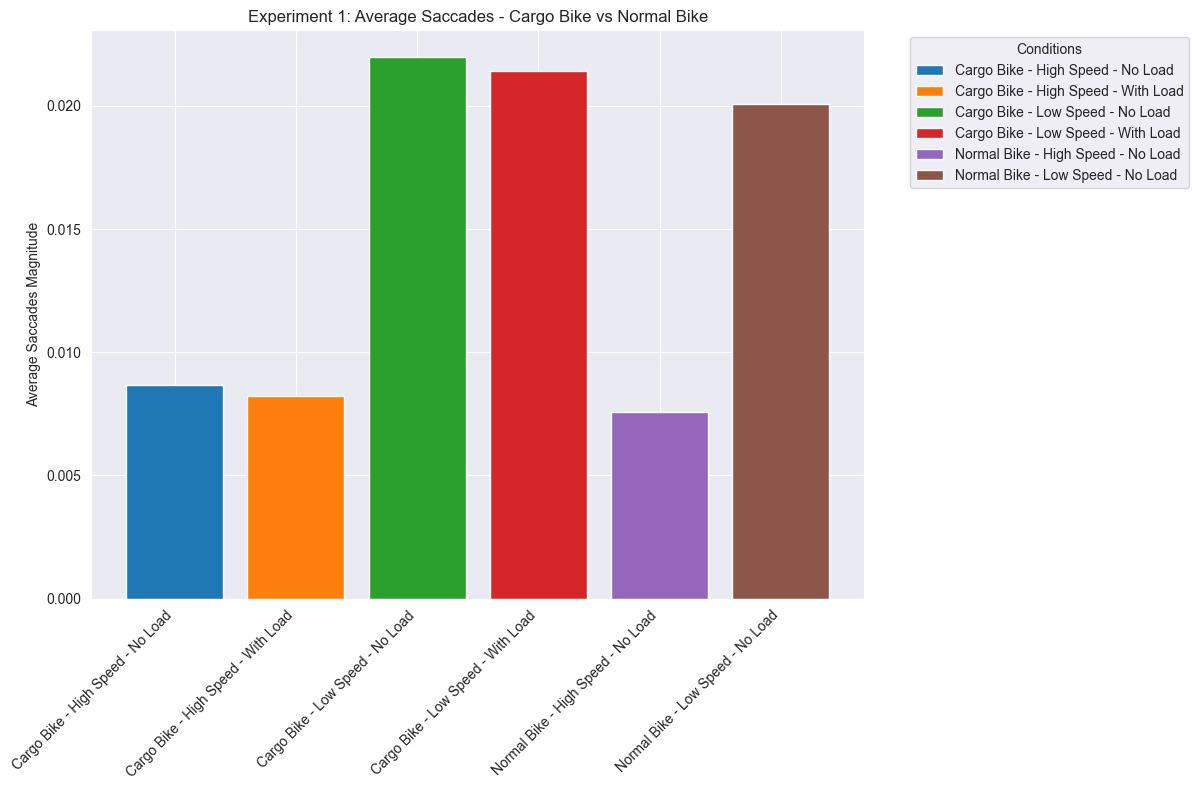

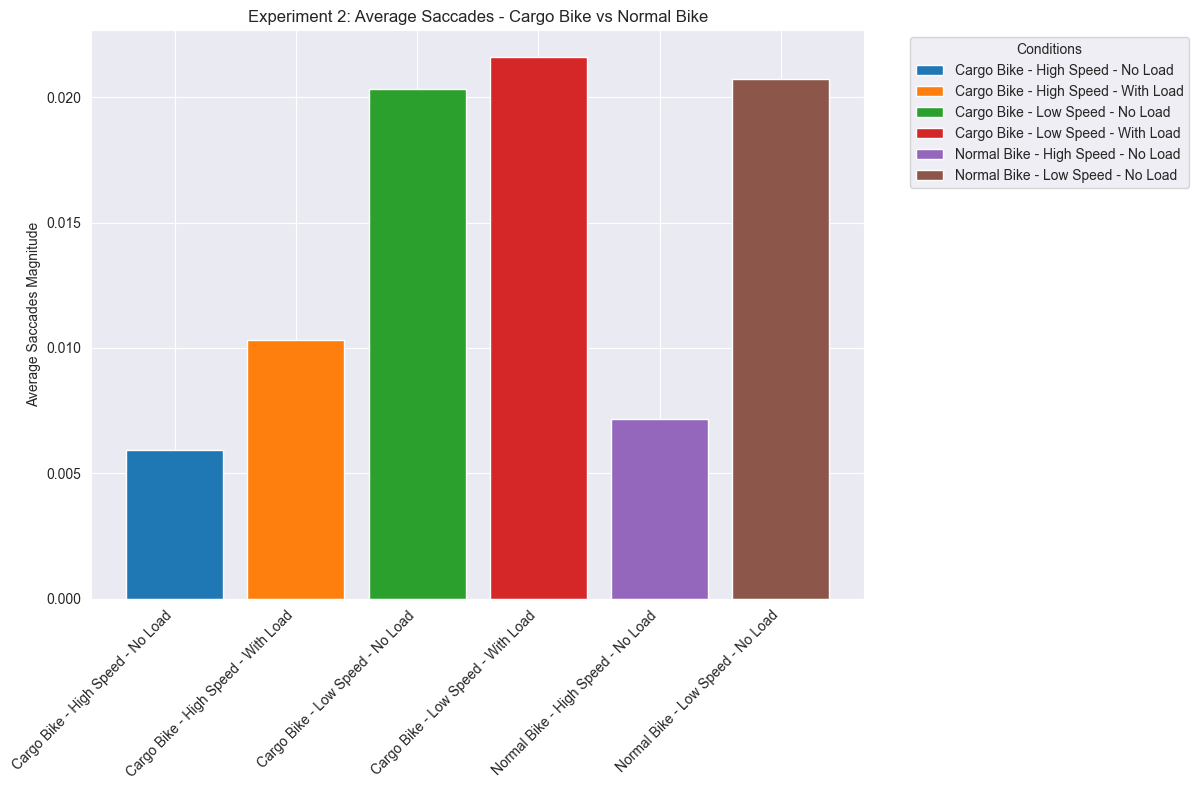

Short route data saved to output_csv_files\experiment_1_short_route_average_saccades_all_conditions.csv
Long route data saved to output_csv_files\experiment_2_long_route_average_saccades_all_conditions.csv


(                             Condition  Average Saccades Magnitude
 0    Cargo Bike - High Speed - No Load                    0.008681
 1  Cargo Bike - High Speed - With Load                    0.008221
 2     Cargo Bike - Low Speed - No Load                    0.021969
 3   Cargo Bike - Low Speed - With Load                    0.021418
 4   Normal Bike - High Speed - No Load                    0.007577
 5    Normal Bike - Low Speed - No Load                    0.020082,
                              Condition  Average Saccades Magnitude
 0    Cargo Bike - High Speed - No Load                    0.005930
 1  Cargo Bike - High Speed - With Load                    0.010298
 2     Cargo Bike - Low Speed - No Load                    0.020331
 3   Cargo Bike - Low Speed - With Load                    0.021584
 4   Normal Bike - High Speed - No Load                    0.007171
 5    Normal Bike - Low Speed - No Load                    0.020708)

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Function to calculate saccades based on changes in gaze positions
def calculate_saccades(eye_data):
    if len(eye_data) < 2:
        return []

    # Calculate the differences between consecutive gaze points
    dx = eye_data['norm_pos_x'].diff().dropna()
    dy = eye_data['norm_pos_y'].diff().dropna()

    # Calculate the Euclidean distance for each saccade
    saccades = np.sqrt(dx**2 + dy**2)
    return saccades

# Function to calculate average saccades for all conditions
def calculate_average_saccades_all_conditions(data_storage, route_name):
    saccades_data = {
        'Cargo Bike - High Speed - No Load': [],
        'Cargo Bike - High Speed - With Load': [],
        'Cargo Bike - Low Speed - No Load': [],
        'Cargo Bike - Low Speed - With Load': [],
        'Normal Bike - High Speed - No Load': [],
        'Normal Bike - Low Speed - No Load': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    saccades = calculate_saccades(eye_data)
                    condition = f"{bike_type} - {speed_type} - {load_type}"
                    if condition in saccades_data:
                        saccades_data[condition].extend(saccades)

    # Calculate the average saccades
    for key in saccades_data:
        saccades_data[key] = np.mean(saccades_data[key]) if saccades_data[key] else 0

    return saccades_data

# Calculate the average saccades for Short Route (Experiment 1)
average_saccades_short = calculate_average_saccades_all_conditions(data_storage, 'Short Route')

# Calculate the average saccades for Long Route (Experiment 2)
average_saccades_long = calculate_average_saccades_all_conditions(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_saccades_short.keys())
experiment_1_saccades = list(average_saccades_short.values())
experiment_2_saccades = list(average_saccades_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(12, 8))
bars1 = plt.bar(conditions, experiment_1_saccades, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average Saccades Magnitude')
plt.title('Experiment 1: Average Saccades - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.legend(bars1, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(12, 8))
bars2 = plt.bar(conditions, experiment_2_saccades, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average Saccades Magnitude')
plt.title('Experiment 2: Average Saccades - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.legend(bars2, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions,
    'Average Saccades Magnitude': experiment_1_saccades
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_average_saccades_all_conditions.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions,
    'Average Saccades Magnitude': experiment_2_saccades
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_average_saccades_all_conditions.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


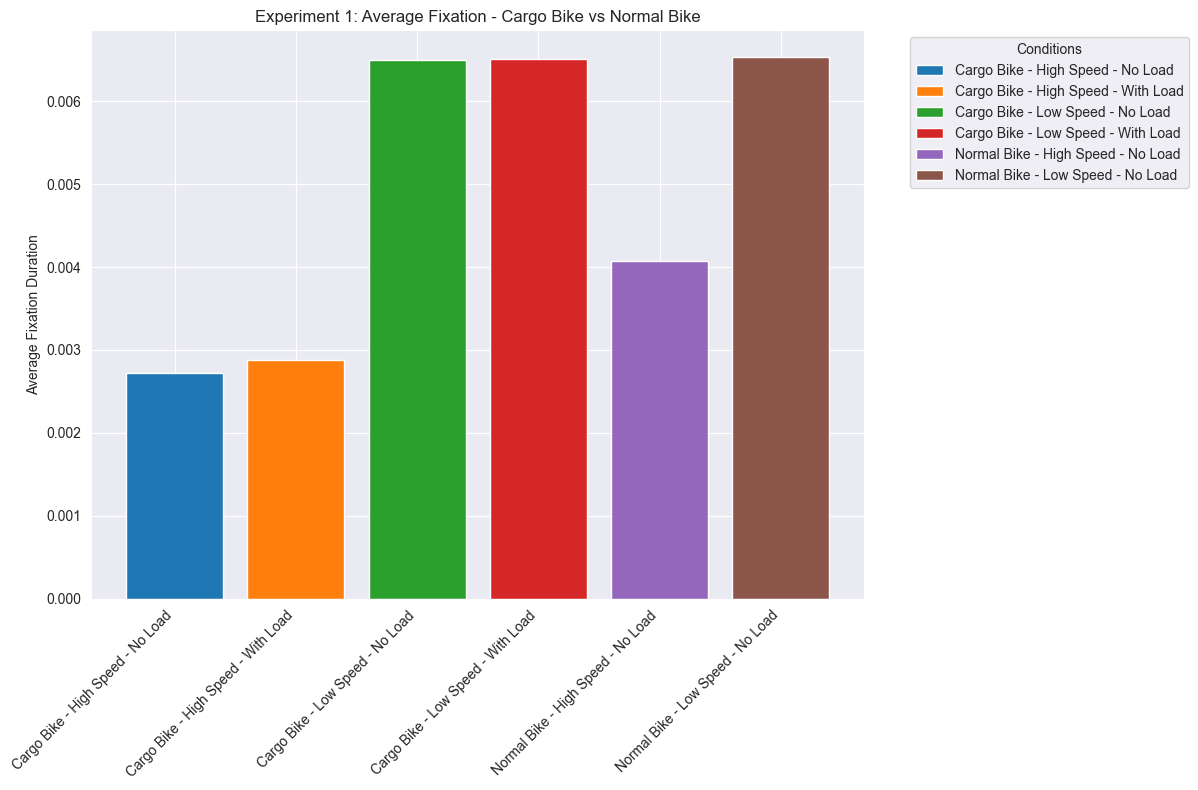

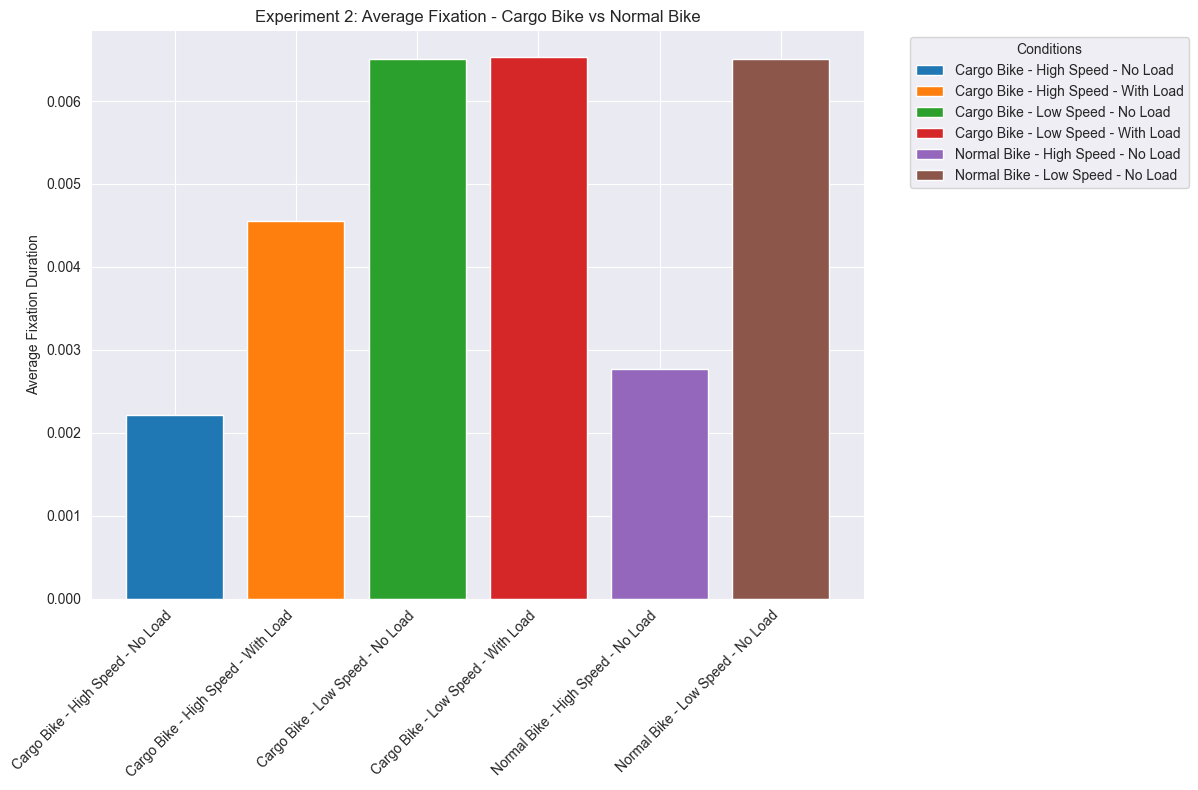

Short route data saved to output_csv_files\experiment_1_short_route_average_fixations.csv
Long route data saved to output_csv_files\experiment_2_long_route_average_fixations.csv


(                             Condition  Average Fixation Duration
 0    Cargo Bike - High Speed - No Load                   0.002719
 1  Cargo Bike - High Speed - With Load                   0.002876
 2     Cargo Bike - Low Speed - No Load                   0.006498
 3   Cargo Bike - Low Speed - With Load                   0.006511
 4   Normal Bike - High Speed - No Load                   0.004073
 5    Normal Bike - Low Speed - No Load                   0.006531,
                              Condition  Average Fixation Duration
 0    Cargo Bike - High Speed - No Load                   0.002216
 1  Cargo Bike - High Speed - With Load                   0.004551
 2     Cargo Bike - Low Speed - No Load                   0.006511
 3   Cargo Bike - Low Speed - With Load                   0.006526
 4   Normal Bike - High Speed - No Load                   0.002768
 5    Normal Bike - Low Speed - No Load                   0.006502)

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Function to calculate fixations based on a small movement threshold
def calculate_fixations(eye_data, threshold=0.01):
    if len(eye_data) < 2:
        return []

    # Calculate the differences between consecutive gaze points
    dx = eye_data['norm_pos_x'].diff().dropna()
    dy = eye_data['norm_pos_y'].diff().dropna()

    # Calculate the Euclidean distance for each movement
    movement = np.sqrt(dx**2 + dy**2)

    # Consider points with movement below the threshold as fixations
    fixations = movement[movement < threshold]

    return fixations

# Function to calculate average fixations for all conditions
def calculate_average_fixations_all_conditions(data_storage, route_name):
    fixation_data = {
        'Cargo Bike - High Speed - No Load': [],
        'Cargo Bike - High Speed - With Load': [],
        'Cargo Bike - Low Speed - No Load': [],
        'Cargo Bike - Low Speed - With Load': [],
        'Normal Bike - High Speed - No Load': [],
        'Normal Bike - Low Speed - No Load': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                if bike_type == 'Normal Bike' and load_type == 'With Load':
                    continue  # Omit "Normal Bike with Load" condition

                eye_data = data_storage[route_name][bike_type][load_type][speed_type]['Eye']
                if eye_data is not None and not eye_data.empty:
                    fixations = calculate_fixations(eye_data)
                    condition = f"{bike_type} - {speed_type} - {load_type}"
                    if condition in fixation_data:
                        fixation_data[condition].extend(fixations)

    # Calculate the average fixation duration
    for key in fixation_data:
        fixation_data[key] = np.mean(fixation_data[key]) if fixation_data[key] else 0

    return fixation_data

# Calculate the average fixations for Short Route (Experiment 1)
average_fixations_short = calculate_average_fixations_all_conditions(data_storage, 'Short Route')

# Calculate the average fixations for Long Route (Experiment 2)
average_fixations_long = calculate_average_fixations_all_conditions(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_fixations_short.keys())
experiment_1_fixations = list(average_fixations_short.values())
experiment_2_fixations = list(average_fixations_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(12, 8))
bars1 = plt.bar(conditions, experiment_1_fixations, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average Fixation Duration')
plt.title('Experiment 1: Average Fixation - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.legend(bars1, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(12, 8))
bars2 = plt.bar(conditions, experiment_2_fixations, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average Fixation Duration')
plt.title('Experiment 2: Average Fixation - Cargo Bike vs Normal Bike')
plt.xticks(rotation=45, ha='right')
plt.legend(bars2, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the output directory if it doesn't exist
output_dir = 'output_csv_files'
os.makedirs(output_dir, exist_ok=True)

# Prepare the data for the Short Route (Experiment 1)
output_data_short = pd.DataFrame({
    'Condition': conditions,
    'Average Fixation Duration': experiment_1_fixations
})

# Save the Short Route data to a CSV file
output_file_short = os.path.join(output_dir, 'experiment_1_short_route_average_fixations.csv')
output_data_short.to_csv(output_file_short, index=False)

# Verify that the short route data was saved successfully
print(f"Short route data saved to {output_file_short}")

# Prepare the data for the Long Route (Experiment 2)
output_data_long = pd.DataFrame({
    'Condition': conditions,
    'Average Fixation Duration': experiment_2_fixations
})

# Save the Long Route data to a CSV file
output_file_long = os.path.join(output_dir, 'experiment_2_long_route_average_fixations.csv')
output_data_long.to_csv(output_file_long, index=False)

# Verify that the long route data was saved successfully
print(f"Long route data saved to {output_file_long}")

# Check if both dataframes are correctly populated
output_data_short, output_data_long


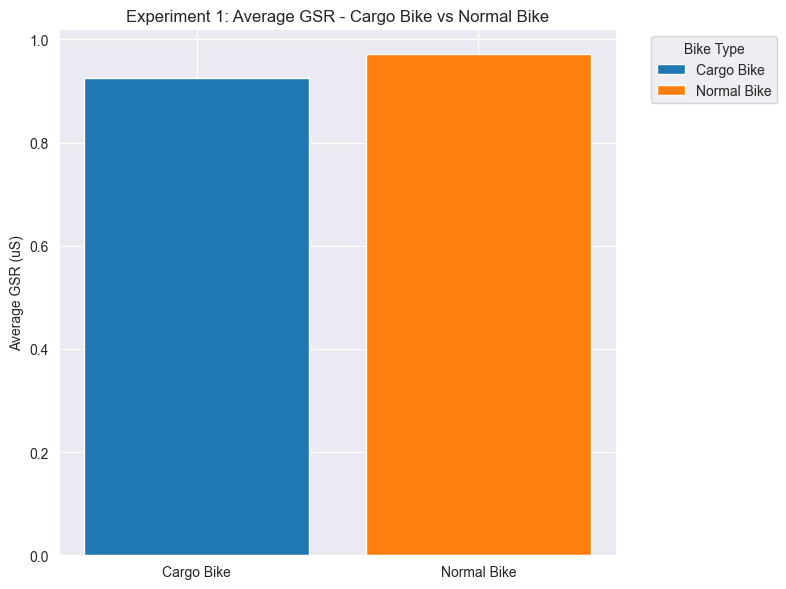

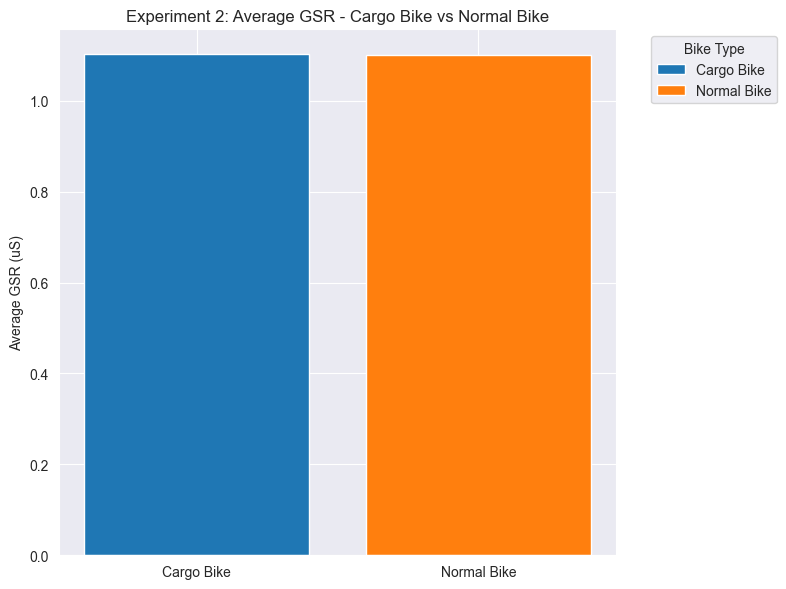

Experiment 1 data saved to average_gsr_experiment_1.csv
Experiment 2 data saved to average_gsr_experiment_2.csv


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to calculate the average GSR for each bike type, averaging across all conditions
def calculate_average_gsr(data_storage, route_name):
    gsr_data = {
        'Cargo Bike': [],
        'Normal Bike': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                if bike_type == 'Normal Bike' and load_type == 'With Load':
                    continue  # Omit "Normal Bike with Load" condition

                gsr_dataset = data_storage[route_name][bike_type][load_type][speed_type].get('GSR')
                if gsr_dataset is not None:
                    gsr_values = gsr_dataset.get('uS')
                    if gsr_values is not None and not gsr_values.empty:
                        gsr_data[bike_type].extend(gsr_values)

    # Calculate the average GSR value
    for key in gsr_data:
        gsr_data[key] = np.mean(gsr_data[key]) if gsr_data[key] else 0

    return gsr_data

# Calculate the average GSR for Short Route (Experiment 1)
average_gsr_short = calculate_average_gsr(data_storage, 'Short Route')

# Calculate the average GSR for Long Route (Experiment 2)
average_gsr_long = calculate_average_gsr(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_gsr_short.keys())
experiment_1_gsr = list(average_gsr_short.values())
experiment_2_gsr = list(average_gsr_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(8, 6))
bars1 = plt.bar(conditions, experiment_1_gsr, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 1: Average GSR - Cargo Bike vs Normal Bike')
plt.xticks(rotation=0)
plt.legend(bars1, conditions, title="Bike Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(8, 6))
bars2 = plt.bar(conditions, experiment_2_gsr, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 2: Average GSR - Cargo Bike vs Normal Bike')
plt.xticks(rotation=0)
plt.legend(bars2, conditions, title="Bike Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data_short = pd.DataFrame({
    'Bike Type': conditions,
    'Experiment 1 (Short Route) - Average GSR (uS)': experiment_1_gsr
})

output_data_long = pd.DataFrame({
    'Bike Type': conditions,
    'Experiment 2 (Long Route) - Average GSR (uS)': experiment_2_gsr
})

# Save to CSV files
output_file_short = 'average_gsr_experiment_1.csv'
output_file_long = 'average_gsr_experiment_2.csv'

output_data_short.to_csv(output_file_short, index=False)
output_data_long.to_csv(output_file_long, index=False)

print(f"Experiment 1 data saved to {output_file_short}")
print(f"Experiment 2 data saved to {output_file_long}")


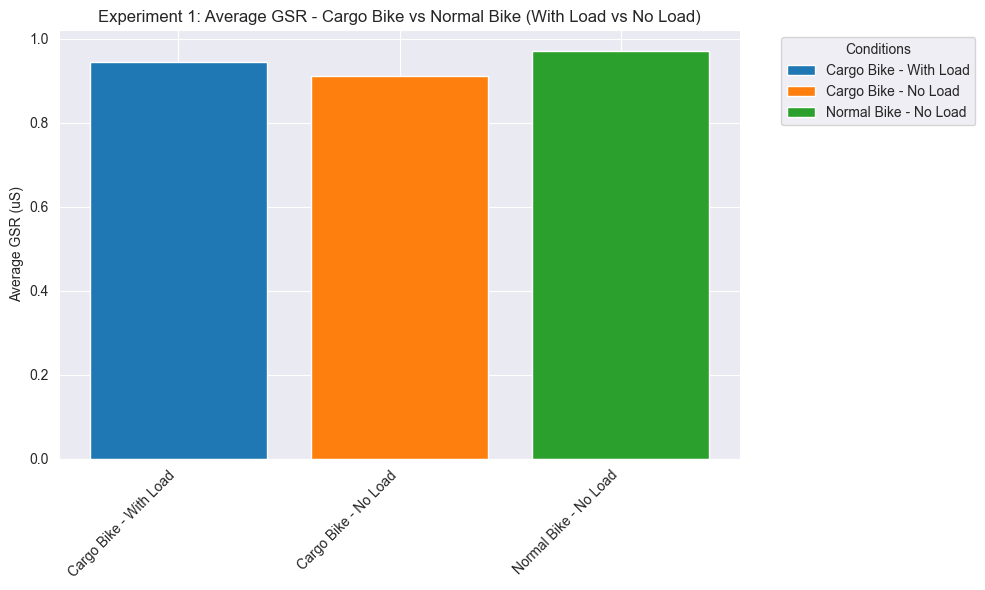

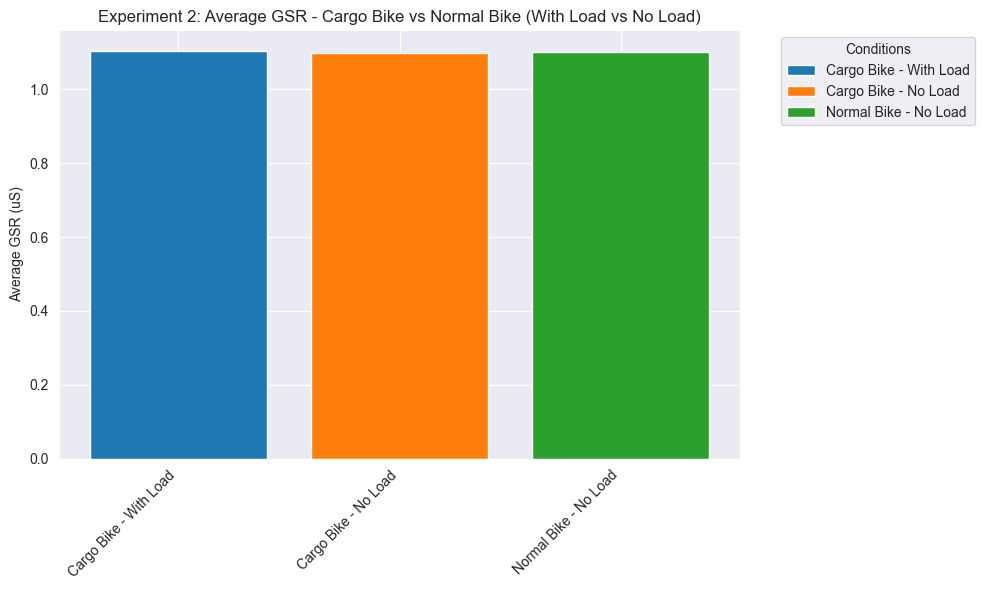

Experiment 1 data saved to average_gsr_by_load_experiment_1.csv
Experiment 2 data saved to average_gsr_by_load_experiment_2.csv


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to calculate the average GSR for each condition, considering load
def calculate_average_gsr_by_load(data_storage, route_name):
    gsr_data = {
        'Cargo Bike - With Load': [],
        'Cargo Bike - No Load': [],
        'Normal Bike - No Load': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                if bike_type == 'Normal Bike' and load_type == 'With Load':
                    continue  # Omit "Normal Bike with Load" condition

                gsr_dataset = data_storage[route_name][bike_type][load_type][speed_type].get('GSR')
                if gsr_dataset is not None:
                    gsr_values = gsr_dataset.get('uS')
                    if gsr_values is not None and not gsr_values.empty:
                        condition = f"{bike_type} - {load_type}"
                        if condition in gsr_data:
                            gsr_data[condition].extend(gsr_values)

    # Calculate the average GSR value
    for key in gsr_data:
        gsr_data[key] = np.mean(gsr_data[key]) if gsr_data[key] else 0

    return gsr_data

# Calculate the average GSR for Short Route (Experiment 1)
average_gsr_short = calculate_average_gsr_by_load(data_storage, 'Short Route')

# Calculate the average GSR for Long Route (Experiment 2)
average_gsr_long = calculate_average_gsr_by_load(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_gsr_short.keys())
experiment_1_gsr = list(average_gsr_short.values())
experiment_2_gsr = list(average_gsr_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(10, 6))
bars1 = plt.bar(conditions, experiment_1_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 1: Average GSR - Cargo Bike vs Normal Bike (With Load vs No Load)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars1, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(10, 6))
bars2 = plt.bar(conditions, experiment_2_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 2: Average GSR - Cargo Bike vs Normal Bike (With Load vs No Load)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars2, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data_short = pd.DataFrame({
    'Condition': conditions,
    'Experiment 1 (Short Route) - Average GSR (uS)': experiment_1_gsr
})

output_data_long = pd.DataFrame({
    'Condition': conditions,
    'Experiment 2 (Long Route) - Average GSR (uS)': experiment_2_gsr
})

# Save to CSV files
output_file_short = 'average_gsr_by_load_experiment_1.csv'
output_file_long = 'average_gsr_by_load_experiment_2.csv'

output_data_short.to_csv(output_file_short, index=False)
output_data_long.to_csv(output_file_long, index=False)

print(f"Experiment 1 data saved to {output_file_short}")
print(f"Experiment 2 data saved to {output_file_long}")


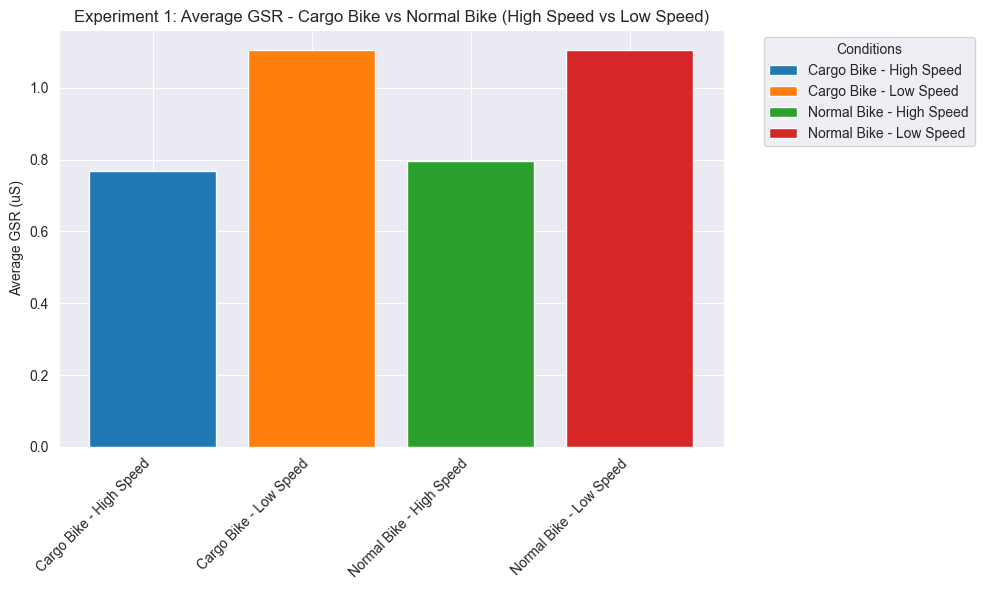

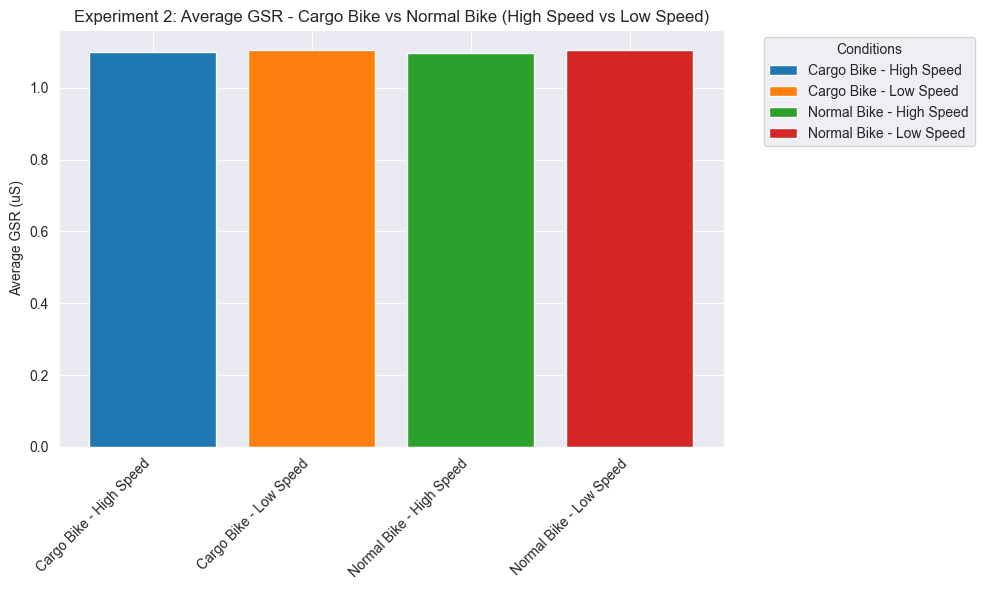

Experiment 1 data saved to average_gsr_by_speed_experiment_1.csv
Experiment 2 data saved to average_gsr_by_speed_experiment_2.csv


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to calculate the average GSR for each condition, considering speed
def calculate_average_gsr_by_speed(data_storage, route_name):
    gsr_data = {
        'Cargo Bike - High Speed': [],
        'Cargo Bike - Low Speed': [],
        'Normal Bike - High Speed': [],
        'Normal Bike - Low Speed': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                if bike_type == 'Normal Bike' and load_type == 'With Load':
                    continue  # Omit "Normal Bike with Load" condition

                gsr_dataset = data_storage[route_name][bike_type][load_type][speed_type].get('GSR')
                if gsr_dataset is not None:
                    gsr_values = gsr_dataset.get('uS')
                    if gsr_values is not None and not gsr_values.empty:
                        condition = f"{bike_type} - {speed_type}"
                        if condition in gsr_data:
                            gsr_data[condition].extend(gsr_values)

    # Calculate the average GSR value
    for key in gsr_data:
        gsr_data[key] = np.mean(gsr_data[key]) if gsr_data[key] else 0

    return gsr_data

# Calculate the average GSR for Short Route (Experiment 1)
average_gsr_short = calculate_average_gsr_by_speed(data_storage, 'Short Route')

# Calculate the average GSR for Long Route (Experiment 2)
average_gsr_long = calculate_average_gsr_by_speed(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_gsr_short.keys())
experiment_1_gsr = list(average_gsr_short.values())
experiment_2_gsr = list(average_gsr_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(10, 6))
bars1 = plt.bar(conditions, experiment_1_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 1: Average GSR - Cargo Bike vs Normal Bike (High Speed vs Low Speed)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars1, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(10, 6))
bars2 = plt.bar(conditions, experiment_2_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 2: Average GSR - Cargo Bike vs Normal Bike (High Speed vs Low Speed)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars2, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data_short = pd.DataFrame({
    'Condition': conditions,
    'Experiment 1 (Short Route) - Average GSR (uS)': experiment_1_gsr
})

output_data_long = pd.DataFrame({
    'Condition': conditions,
    'Experiment 2 (Long Route) - Average GSR (uS)': experiment_2_gsr
})

# Save to CSV files
output_file_short = 'average_gsr_by_speed_experiment_1.csv'
output_file_long = 'average_gsr_by_speed_experiment_2.csv'

output_data_short.to_csv(output_file_short, index=False)
output_data_long.to_csv(output_file_long, index=False)

print(f"Experiment 1 data saved to {output_file_short}")
print(f"Experiment 2 data saved to {output_file_long}")


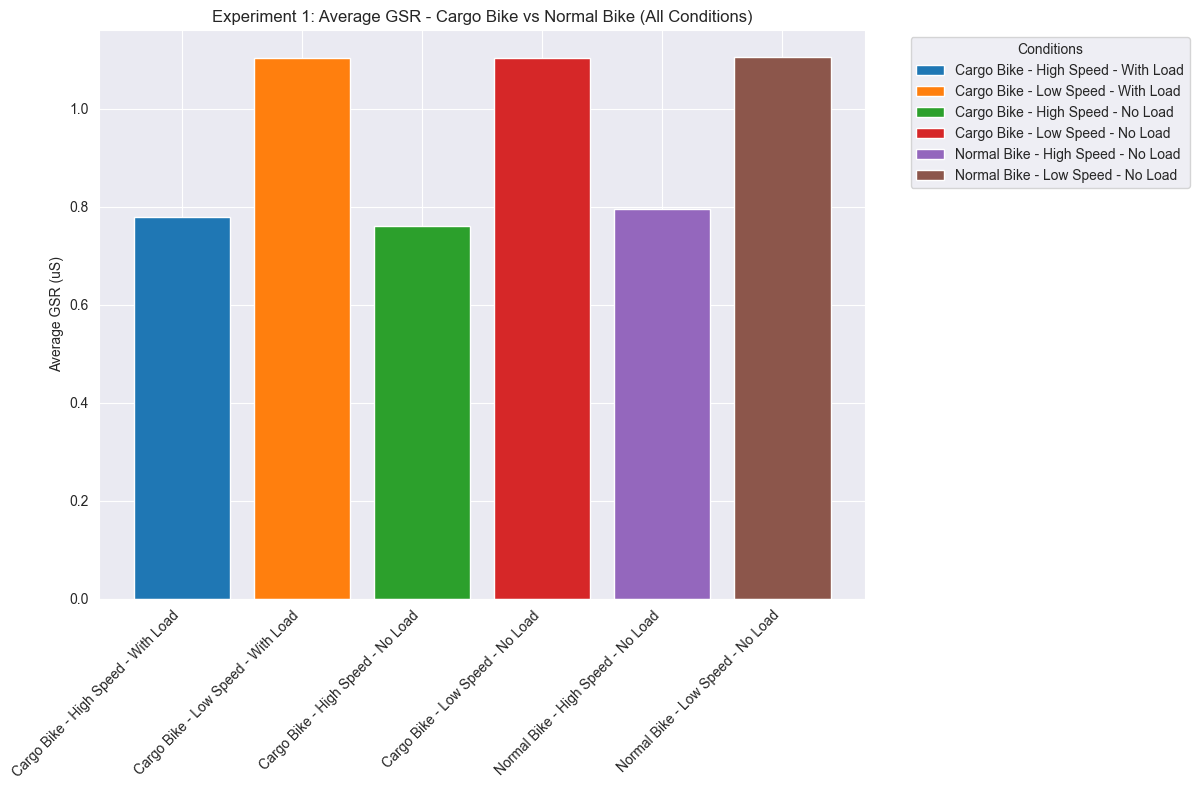

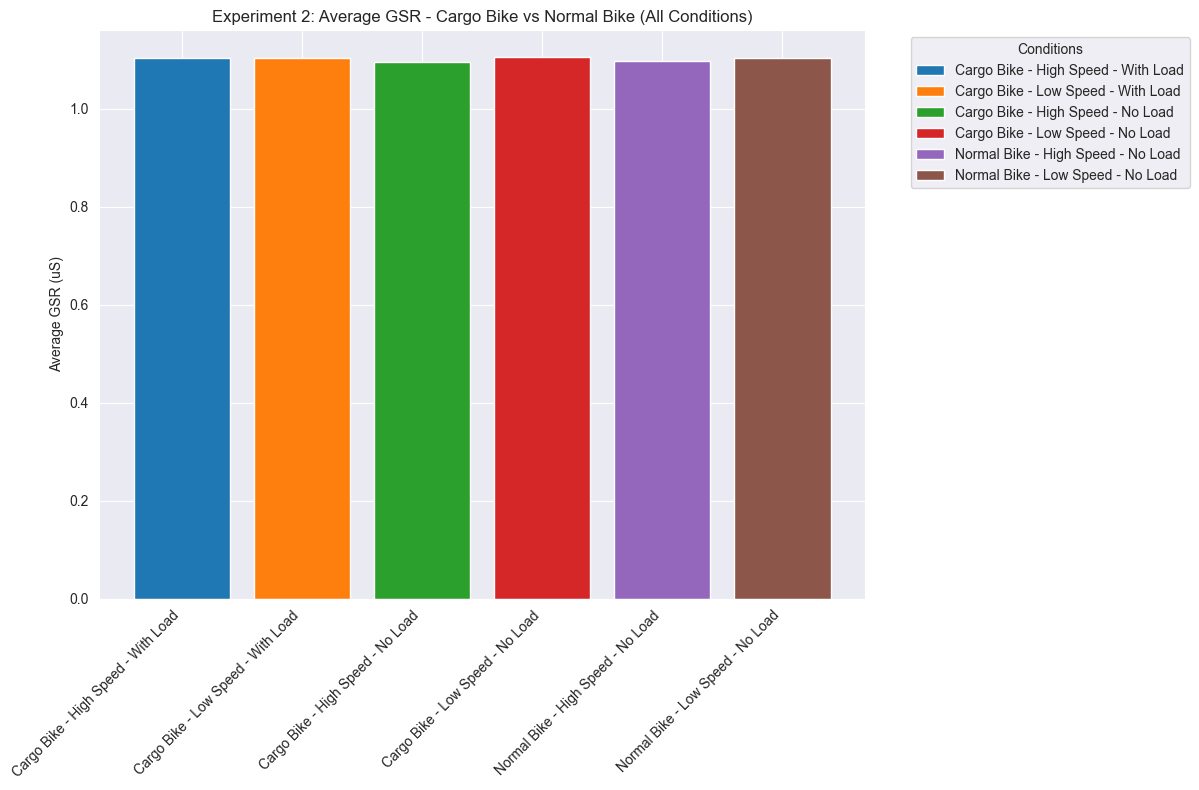

Experiment 1 data saved to average_gsr_all_conditions_experiment_1.csv
Experiment 2 data saved to average_gsr_all_conditions_experiment_2.csv


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to calculate the average GSR for each condition
def calculate_average_gsr_all_conditions(data_storage, route_name):
    gsr_data = {
        'Cargo Bike - High Speed - With Load': [],
        'Cargo Bike - Low Speed - With Load': [],
        'Cargo Bike - High Speed - No Load': [],
        'Cargo Bike - Low Speed - No Load': [],
        'Normal Bike - High Speed - No Load': [],
        'Normal Bike - Low Speed - No Load': []
    }

    for bike_type in data_storage[route_name]:
        for load_type in data_storage[route_name][bike_type]:
            for speed_type in data_storage[route_name][bike_type][load_type]:
                if bike_type == 'Normal Bike' and load_type == 'With Load':
                    continue  # Omit "Normal Bike with Load" condition

                gsr_dataset = data_storage[route_name][bike_type][load_type][speed_type].get('GSR')
                if gsr_dataset is not None:
                    gsr_values = gsr_dataset.get('uS')
                    if gsr_values is not None and not gsr_values.empty:
                        condition = f"{bike_type} - {speed_type} - {load_type}"
                        if condition in gsr_data:
                            gsr_data[condition].extend(gsr_values)

    # Calculate the average GSR value
    for key in gsr_data:
        gsr_data[key] = np.mean(gsr_data[key]) if gsr_data[key] else 0

    return gsr_data

# Calculate the average GSR for Short Route (Experiment 1)
average_gsr_short = calculate_average_gsr_all_conditions(data_storage, 'Short Route')

# Calculate the average GSR for Long Route (Experiment 2)
average_gsr_long = calculate_average_gsr_all_conditions(data_storage, 'Long Route')

# Define the data for plotting
conditions = list(average_gsr_short.keys())
experiment_1_gsr = list(average_gsr_short.values())
experiment_2_gsr = list(average_gsr_long.values())

# Plotting the bar graph for Experiment 1 (Short Route)
plt.figure(figsize=(12, 8))
bars1 = plt.bar(conditions, experiment_1_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 1: Average GSR - Cargo Bike vs Normal Bike (All Conditions)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars1, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bar graph for Experiment 2 (Long Route)
plt.figure(figsize=(12, 8))
bars2 = plt.bar(conditions, experiment_2_gsr, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.ylabel('Average GSR (uS)')
plt.title('Experiment 2: Average GSR - Cargo Bike vs Normal Bike (All Conditions)')
plt.xticks(rotation=45, ha='right')
plt.legend(bars2, conditions, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare the data for CSV output
output_data_short = pd.DataFrame({
    'Condition': conditions,
    'Experiment 1 (Short Route) - Average GSR (uS)': experiment_1_gsr
})

output_data_long = pd.DataFrame({
    'Condition': conditions,
    'Experiment 2 (Long Route) - Average GSR (uS)': experiment_2_gsr
})

# Save to CSV files
output_file_short = 'average_gsr_all_conditions_experiment_1.csv'
output_file_long = 'average_gsr_all_conditions_experiment_2.csv'

output_data_short.to_csv(output_file_short, index=False)
output_data_long.to_csv(output_file_long, index=False)

print(f"Experiment 1 data saved to {output_file_short}")
print(f"Experiment 2 data saved to {output_file_long}")


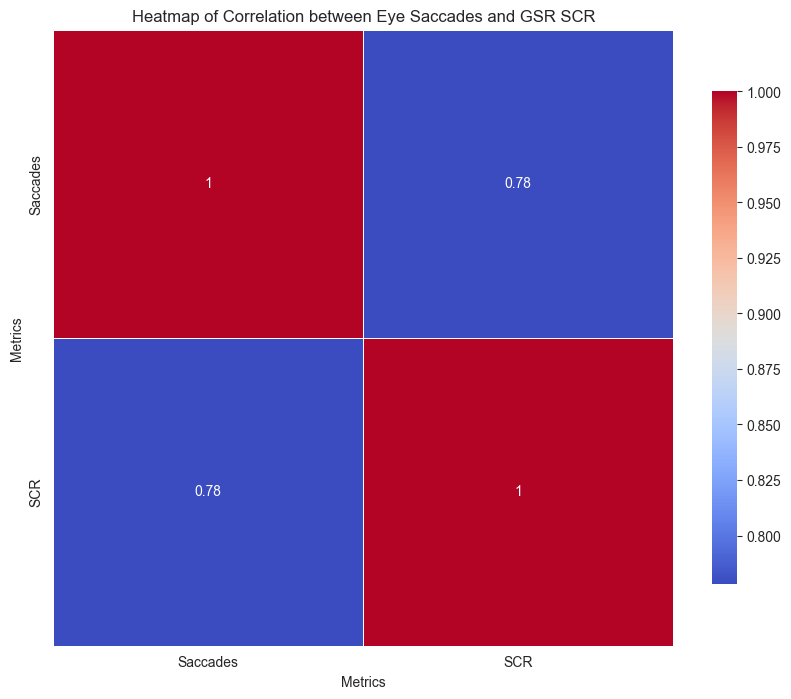

Correlation data saved to 'saccades_scr_correlation.csv'
Raw data saved to 'saccades_scr_raw_data.csv'


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate saccades from eye data
def calculate_saccades(eye_data):
    # Placeholder: Replace with actual saccade calculation
    saccades = eye_data['norm_pos_x'].diff().abs() + eye_data['norm_pos_y'].diff().abs()
    return saccades.sum()

# Function to calculate SCR from GSR data
def calculate_scr(gsr_data):
    # Placeholder: Replace with actual SCR calculation
    scr = gsr_data['uS'].diff().abs()
    return scr.sum()

# Extract relevant data while omitting "Normal Bike with Load"
data_to_correlate = []
conditions = []

for route in data_storage:
    for bike_type in data_storage[route]:
        for load_type in data_storage[route][bike_type]:
            if bike_type == 'Normal Bike' and load_type == 'With Load':
                continue  # Omit this condition

            for speed_type in data_storage[route][bike_type][load_type]:
                eye_data = data_storage[route][bike_type][load_type][speed_type]['Eye']
                gsr_data = data_storage[route][bike_type][load_type][speed_type]['GSR']

                if not eye_data.empty and not gsr_data.empty:
                    saccades = calculate_saccades(eye_data)
                    scr = calculate_scr(gsr_data)
                    data_to_correlate.append([saccades, scr])
                    conditions.append(f"{bike_type} - {load_type} - {speed_type}")

# Create a DataFrame for correlation analysis
df_correlation = pd.DataFrame(data_to_correlate, columns=['Saccades', 'SCR'], index=conditions)

# Compute the correlation matrix
correlation_matrix = df_correlation.corr()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('saccades_scr_correlation.csv', index=True)

# Save the raw data (Saccades and SCR) to a CSV file
df_correlation.to_csv('saccades_scr_raw_data.csv', index=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation between Eye Saccades and GSR SCR')
plt.xlabel('Metrics')
plt.ylabel('Metrics')
plt.show()

print("Correlation data saved to 'saccades_scr_correlation.csv'")
print("Raw data saved to 'saccades_scr_raw_data.csv'")
